### 1.打印x,y矩阵

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


folder_path = 'E:/2412毕业论文/0104数据特征/wind250109/0109沪深300股票1/处理2/处理'

def load_and_preprocess_data(file_path):
    """
    加载并预处理数据
    :param file_path: 文件路径
    :param selected_columns: 要选择的列索引列表，默认为 [3, 5, 7, 12][开盘价、收盘价、涨跌、涨跌幅、MACD]
    :return: 预处理后的序列数据和所选列名列表
    """
    skip_column_names = ['所属申万行业名称(2014)_[行业级别]一级行业', '股票收益率1']
    column_used = ['开盘价', '收盘价', '涨跌', '涨跌幅', 'RSI相对强弱指标_[周期数]6', '净买入额_[单位]元_[类型]机构', 'BIAS乖离率_[周期数]12', 'MACD指数平滑移动平均_[MACD指标选项]DIFF_[周期数]9_[短期周期数]12_[长期周期数]26', '股票收益率2']
    all_columns = pd.read_excel(file_path, nrows=0).columns
    columns_to_use = [col for col in all_columns if col in column_used]
    data = pd.read_excel(file_path, usecols=columns_to_use)
    data = data.iloc[7:, :]


    y = data['股票收益率2'].values
    x = data.drop(columns=['股票收益率2']).values

    print(f"文件 {file_path} 的原始 x 矩阵：")
    print(x)
    print(f"文件 {file_path} 的原始 y 矩阵：")
    print(y)

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_scaled = scaler_x.fit_transform(x)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    print(f"文件 {file_path} 的标准化后 x 矩阵：")
    print(x_scaled)
    print(f"文件 {file_path} 的标准化后 y 矩阵：")
    print(y_scaled)

    return x_scaled, y_scaled

for file in os.listdir(folder_path):
    if file.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file)
        x_scaled, y_scaled = load_and_preprocess_data(file_path)


In [ ]:

def load_and_preprocess_data1(file_path):
    """
    加载并预处理数据
    :param file_path: 文件路径
    :return: 预处理后的序列数据
    """

    skip_column_names = ['所属申万行业名称(2014)_[行业级别]一级行业', '股票收益率1']
    all_columns = pd.read_excel(file_path, nrows=0).columns
    columns_to_use = [col for col in all_columns if col not in skip_column_names]
    data = pd.read_excel(file_path, usecols=columns_to_use)
    data = data.iloc[7:, 1:]
    x = data.iloc[:, 3:11].values
    y = data.iloc[:, -5].values

    print(f"文件 {file_path} 的原始 x 矩阵：")
    print(x)
    print(f"文件 {file_path} 的原始 y 矩阵：")
    print(y)


    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_scaled = scaler_x.fit_transform(x)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))


    print(f"文件 {file_path} 的标准化后 x 矩阵：")
    print(x_scaled)
    print(f"文件 {file_path} 的标准化后 y 矩阵：")
    print(y_scaled)

    return x_scaled, y_scaled

for file in os.listdir(folder_path):
    if file.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file)
        x_scaled, y_scaled = load_and_preprocess_data1(file_path)

文件 E:/2412毕业论文/0104数据特征/wind250109/0109沪深300股票1/处理2/处理\000001.SZ_平安银行_all2.xlsx 的原始 x 矩阵：
[[ 1.47800000e+01  1.52000000e+01  1.47000000e+01 ...  1.88929668e+09
   1.30000000e-01  8.85558583e-01]
 [ 1.48500000e+01  1.53500000e+01  1.47100000e+01 ...  1.86879591e+09
   5.40000000e-01  3.64618501e+00]
 [ 1.54000000e+01  1.56200000e+01  1.51800000e+01 ...  2.40334619e+09
   2.00000000e-02  1.30293160e-01]
 ...
 [ 1.19900000e+01  1.21000000e+01  1.19700000e+01 ...  7.44718416e+08
   1.10000000e-01  9.18196995e-01]
 [ 1.20900000e+01  1.21100000e+01  1.19500000e+01 ...  6.41277265e+08
   1.00000000e-02  8.27129859e-02]
 [ 1.21000000e+01  1.21300000e+01  1.19800000e+01 ...  5.91643591e+08
  -1.10000000e-01 -9.09090909e-01]]
文件 E:/2412毕业论文/0104数据特征/wind250109/0109沪深300股票1/处理2/处理\000001.SZ_平安银行_all2.xlsx 的原始 y 矩阵：
[ 0.00885559  0.03646185  0.00130293 -0.10019519  0.          0.04266088
 -0.00832178  0.00699301 -0.00416667 -0.02440725  0.00500357 -0.0113798
  0.00215827 -0.02153625  0.02347762 -0

### 1.lstm模型

GPU 可用，使用 GPU 加速
Epoch 1/600, Validation Loss: 0.031189934976065335
Epoch 2/600, Validation Loss: 0.02929485155575311
Epoch 3/600, Validation Loss: 0.028862159921606973
Epoch 4/600, Validation Loss: 0.02817860662714759
Epoch 5/600, Validation Loss: 0.027741721872963122
Epoch 6/600, Validation Loss: 0.027504080767506985
Epoch 7/600, Validation Loss: 0.02732639004990681
Epoch 8/600, Validation Loss: 0.026675655367547898
Epoch 9/600, Validation Loss: 0.026584793354815513
Epoch 10/600, Validation Loss: 0.02622777908873647
Epoch 11/600, Validation Loss: 0.02600524568958069
Epoch 12/600, Validation Loss: 0.02554408711061549
Epoch 13/600, Validation Loss: 0.02571598072049778
Epoch 14/600, Validation Loss: 0.025121457596768194
Epoch 15/600, Validation Loss: 0.025370369915530752
Epoch 16/600, Validation Loss: 0.024893781017345278
Epoch 17/600, Validation Loss: 0.024765012799692687
Epoch 18/600, Validation Loss: 0.02506951360838182
Epoch 19/600, Validation Loss: 0.02449879103076102
Epoch 20/600,

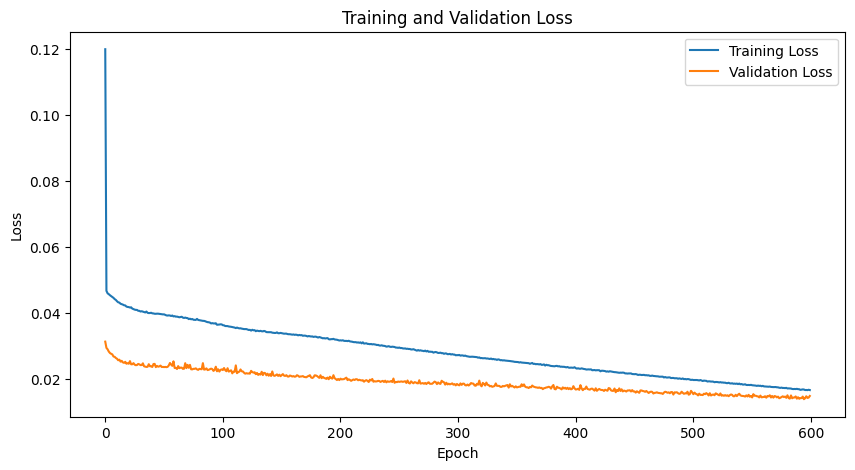

000001.SZ_平安银行_all2.xlsx: MAE=0.08831610530614853, MSE=0.012673214077949524, R2=-1.5516562088057935
000002.SZ_万科A_all2.xlsx: MAE=0.24630911648273468, MSE=0.09550399333238602, R2=-0.7180119617496465
000063.SZ_中兴通讯_all2.xlsx: MAE=0.07805553078651428, MSE=0.008588961325585842, R2=0.03273383970304078
000100.SZ_TCL科技_all2.xlsx: MAE=0.10960692167282104, MSE=0.023480383679270744, R2=-0.2955301344667569
000157.SZ_中联重科_all2.xlsx: MAE=0.142314150929451, MSE=0.030567308887839317, R2=-0.7802322052982509
000166.SZ_申万宏源_all2.xlsx: MAE=0.12670846283435822, MSE=0.023877955973148346, R2=-0.42548037307721565
000301.SZ_东方盛虹_all2.xlsx: MAE=0.11094337701797485, MSE=0.017985505983233452, R2=-0.11971778134340094
000333.SZ_美的集团_all2.xlsx: MAE=0.12446657568216324, MSE=0.025668039917945862, R2=-0.3392959397839075
000338.SZ_潍柴动力_all2.xlsx: MAE=0.049949854612350464, MSE=0.003683626651763916, R2=-2.508794525577864
000408.SZ_藏格矿业_all2.xlsx: MAE=0.13427424430847168, MSE=0.03645281866192818, R2=-1.2789032091690897
00

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


def create_sequences(input_data, target_data, seq_length):
    """
    创建时间序列数据窗口
    :param input_data: 输入数据
    :param target_data: 目标数据
    :param seq_length: 时间序列长度
    :return: 序列输入和序列目标
    """
    sequences_x = []
    sequences_y = []
    for i in range(len(input_data) - seq_length):
        sequences_x.append(input_data[i:i + seq_length])
        sequences_y.append(target_data[i + seq_length])
    return np.array(sequences_x), np.array(sequences_y)


def load_and_preprocess_data(file_path):
    """
    加载并预处理数据
    :param file_path: 文件路径
    :param selected_columns: 要选择的列索引列表，默认为 [3, 5, 7, 12][开盘价、收盘价、涨跌、涨跌幅、MACD]
    :return: 预处理后的序列数据和所选列名列表
    """

    skip_column_names = ['所属申万行业名称(2014)_[行业级别]一级行业', '股票收益率1']
    column_used = ['开盘价', '收盘价', '涨跌', '涨跌幅', 'RSI相对强弱指标_[周期数]6', '净买入额_[单位]元_[类型]机构', 'BIAS乖离率_[周期数]12', 'MACD指数平滑移动平均_[MACD指标选项]DIFF_[周期数]9_[短期周期数]12_[长期周期数]26', '股票收益率2']
    all_columns = pd.read_excel(file_path, nrows=0).columns
    columns_to_use = [col for col in all_columns if col in column_used]
    data = pd.read_excel(file_path, usecols=columns_to_use)
    data = data.iloc[7:, :]


    if data.isnull().values.any() or np.isinf(data.values).any():
        data = data.replace([np.inf, -np.inf], np.nan).dropna()


    x = data.drop(columns=['股票收益率2']).values
    y = data['股票收益率2'].values

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_scaled = scaler_x.fit_transform(x)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
    return x_scaled, y_scaled


def train_model(model, train_loader, val_loader, num_epochs, learning_rate, device):
    """
    训练模型
    :param model: 模型
    :param train_loader: 训练数据加载器
    :param val_loader: 验证数据加载器
    :param num_epochs: 训练轮数
    :param learning_rate: 学习率
    :param device: 运行设备
    :return: 训练损失列表，验证损失列表
    """
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    val_losses = []

    all_train_data = ConcatDataset([train_loader.dataset, val_loader.dataset])
    all_train_loader = DataLoader(all_train_data, batch_size=32, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0
        for inputs, targets in all_train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        train_losses.append(epoch_train_loss / len(all_train_loader))
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        val_losses.append(val_loss / len(val_loader))
        print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss / len(val_loader)}')
    return train_losses, val_losses


def evaluate_model(model, test_loader, device):
    """
    评估模型
    :param model: 模型
    :param test_loader: 测试数据加载器
    :param device: 运行设备
    :return: 测试集上的 MAE, MSE, R2 指标
    """
    criterion = nn.MSELoss()
    model.eval()
    test_loss = 0
    test_predictions = []
    test_targets = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            test_loss += criterion(outputs, targets).item()
            test_predictions.extend(outputs.cpu().numpy().flatten())
            test_targets.extend(targets.cpu().numpy().flatten())
    test_loss /= len(test_loader)
    mae = mean_absolute_error(test_targets, test_predictions)
    mse = mean_squared_error(test_targets, test_predictions)
    r2 = r2_score(test_targets, test_predictions)
    return mae, mse, r2


def main():
    folder_path = 'E:/2412毕业论文/0104数据特征/wind250109/0109沪深300股票1/处理2/处理'
    time_windows = 10
    num_epochs = 600
    learning_rate = 0.0001  
    input_size = 8  
    hidden_size = 50
    num_layers = 2
    output_size = 1

    if torch.cuda.is_available():
        device = torch.device("cuda:0")  
        print("GPU 可用，使用 GPU 加速")
    else:
        device = torch.device("cpu")
        print("GPU 不可用，使用 CPU")

    all_train_losses = []
    all_val_losses = []
    all_mae = []
    all_mse = []
    all_r2 = []

    all_train_x = []
    all_train_y = []
    all_val_x = []
    all_val_y = []
    all_test_x = []
    all_test_y = []

    file_list = []

    for file in os.listdir(folder_path):
        if file.endswith('.xlsx'):
            file_list.append(file)
            file_path = os.path.join(folder_path, file)
            x_scaled, y_scaled = load_and_preprocess_data(file_path)  
            sequences_x, sequences_y = create_sequences(x_scaled, y_scaled, time_windows)  
            sequences_x = torch.FloatTensor(sequences_x).to(device)
            sequences_y = torch.FloatTensor(sequences_y).to(device)
            train_size = int(0.7 * len(sequences_x))
            val_size = int(0.2 * len(sequences_x))
            test_size = len(sequences_x) - train_size - val_size
            train_x = sequences_x[:train_size]
            train_y = sequences_y[:train_size]
            val_x = sequences_x[train_size:train_size + val_size]  
            val_y = sequences_y[train_size:train_size + val_size]
            all_train_x.append(train_x)
            all_train_y.append(train_y)
            all_val_x.append(val_x)
            all_val_y.append(val_y)
            all_test_x.append(sequences_x[train_size + val_size:])
            all_test_y.append(sequences_y[train_size + val_size:])


    train_x = torch.cat(all_train_x, dim=0)
    train_y = torch.cat(all_train_y, dim=0)
    val_x = torch.cat(all_val_x, dim=0)
    val_y = torch.cat(all_val_y, dim=0)

    train_dataset = TensorDataset(train_x, train_y)
    val_dataset = TensorDataset(val_x, val_y)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) 
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

    model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

    train_losses, val_losses = train_model(model, train_loader, val_loader, num_epochs, learning_rate, device)


    for i, file in enumerate(file_list):
        test_x = all_test_x[i]
        test_y = all_test_y[i]
        test_dataset = TensorDataset(test_x, test_y)
        test_loader = DataLoader(test_dataset, batch_size=32)
        mae, mse, r2 = evaluate_model(model, test_loader, device)
        all_mae.append(mae)
        all_mse.append(mse)
        all_r2.append(r2)

    all_train_losses.extend(train_losses)
    all_val_losses.extend(val_losses)


    plt.figure(figsize=(10, 5))
    plt.plot(all_train_losses, label='Training Loss')
    plt.plot(all_val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()


    for i, file in enumerate(file_list):
        print(f'{file}: MAE={all_mae[i]}, MSE={all_mse[i]}, R2={all_r2[i]}')


    model_save_path = 'best_lstm_model.pth'
    torch.save(model.state_dict(), model_save_path)
    print(f"模型已存储在 {model_save_path}")


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


if __name__ == "__main__":
    main()

### 2.复杂模型BiLSTM-Att-GRU-CNN

GPU 可用，使用 GPU 加速
Epoch 1/600, Validation Loss: 0.02882722319006475
Epoch 2/600, Validation Loss: 0.026047744232215987
Epoch 3/600, Validation Loss: 0.02613491226168377
Epoch 4/600, Validation Loss: 0.02590153455289442
Epoch 5/600, Validation Loss: 0.02327649566386618
Epoch 6/600, Validation Loss: 0.022211736874349082
Epoch 7/600, Validation Loss: 0.025914985491935886
Epoch 8/600, Validation Loss: 0.021194125789759766
Epoch 9/600, Validation Loss: 0.020982027637647158
Epoch 10/600, Validation Loss: 0.02110662885399452
Epoch 11/600, Validation Loss: 0.020478815549233958
Epoch 12/600, Validation Loss: 0.020312740189482027
Epoch 13/600, Validation Loss: 0.020355959798195468
Epoch 14/600, Validation Loss: 0.020177134312689304
Epoch 15/600, Validation Loss: 0.020422825339569975
Epoch 16/600, Validation Loss: 0.02369051391898251
Epoch 17/600, Validation Loss: 0.02025529618527907
Epoch 18/600, Validation Loss: 0.021757002482051726
Epoch 19/600, Validation Loss: 0.019591413910931617
Epoch 20/60

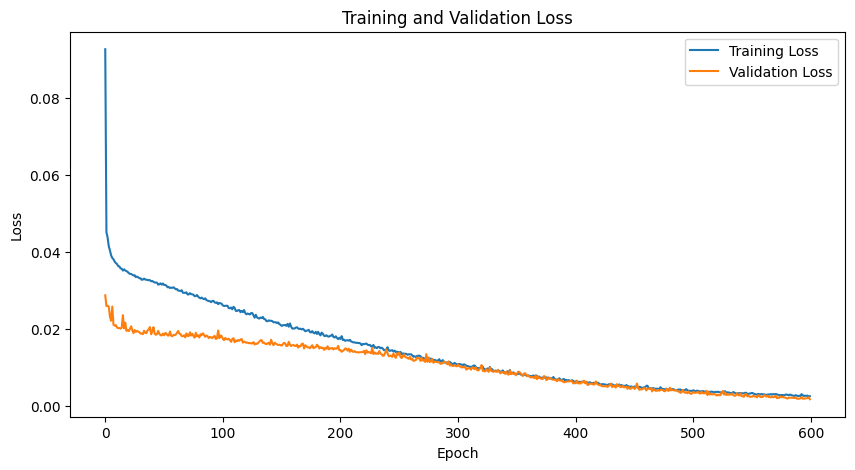

000001.SZ_平安银行_all2.xlsx: MAE=0.1048206090927124, MSE=0.015300842933356762, R2=-2.080709643007965
000002.SZ_万科A_all2.xlsx: MAE=0.22904813289642334, MSE=0.08475083857774734, R2=-0.5245744811790338
000063.SZ_中兴通讯_all2.xlsx: MAE=0.09683047980070114, MSE=0.01574804075062275, R2=-0.7735030321351286
000100.SZ_TCL科技_all2.xlsx: MAE=0.13970880210399628, MSE=0.03633498027920723, R2=-1.0047825207857124
000157.SZ_中联重科_all2.xlsx: MAE=0.11981376260519028, MSE=0.0219267550855875, R2=-0.2770084572638083
000166.SZ_申万宏源_all2.xlsx: MAE=0.2800877094268799, MSE=0.10654938220977783, R2=-5.360848752654042
000301.SZ_东方盛虹_all2.xlsx: MAE=0.1337580680847168, MSE=0.03349938243627548, R2=-1.0855599341481743
000333.SZ_美的集团_all2.xlsx: MAE=0.12822391092777252, MSE=0.030459731817245483, R2=-0.5893147313220395
000338.SZ_潍柴动力_all2.xlsx: MAE=0.032645948231220245, MSE=0.0013791319215670228, R2=-0.31367577588709583
000408.SZ_藏格矿业_all2.xlsx: MAE=0.1080281212925911, MSE=0.026066429913043976, R2=-0.6295824633870972
000425.SZ_

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


def create_sequences(input_data, target_data, seq_length):
    """
    创建时间序列数据窗口
    :param input_data: 输入数据
    :param target_data: 目标数据
    :param seq_length: 时间序列长度
    :return: 序列输入和序列目标
    """
    sequences_x = []
    sequences_y = []
    for i in range(len(input_data) - seq_length):
        sequences_x.append(input_data[i:i + seq_length])
        sequences_y.append(target_data[i + seq_length])
    return np.array(sequences_x), np.array(sequences_y)


def load_and_preprocess_data(file_path):
    """
    加载并预处理数据
    :param file_path: 文件路径
    :param selected_columns: 要选择的列索引列表，默认为 [3, 5, 7, 12][开盘价、收盘价、涨跌、涨跌幅、MACD]
    :return: 预处理后的序列数据和所选列名列表
    """

    skip_column_names = ['所属申万行业名称(2014)_[行业级别]一级行业', '股票收益率1']
    column_used = ['开盘价', '收盘价', '涨跌', '涨跌幅', 'RSI相对强弱指标_[周期数]6', '净买入额_[单位]元_[类型]机构', 'BIAS乖离率_[周期数]12', 'MACD指数平滑移动平均_[MACD指标选项]DIFF_[周期数]9_[短期周期数]12_[长期周期数]26', '股票收益率2']
    all_columns = pd.read_excel(file_path, nrows=0).columns
    columns_to_use = [col for col in all_columns if col in column_used]
    data = pd.read_excel(file_path, usecols=columns_to_use)
    data = data.iloc[7:, :]


    if data.isnull().values.any() or np.isinf(data.values).any():
        data = data.replace([np.inf, -np.inf], np.nan).dropna()


    x = data.drop(columns=['股票收益率2']).values
    y = data['股票收益率2'].values

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_scaled = scaler_x.fit_transform(x)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
    return x_scaled, y_scaled


def train_model(model, train_loader, val_loader, num_epochs, learning_rate, device):
    """
    训练模型
    :param model: 模型
    :param train_loader: 训练数据加载器
    :param val_loader: 验证数据加载器
    :param num_epochs: 训练轮数
    :param learning_rate: 学习率
    :param device: 运行设备
    :return: 训练损失列表，验证损失列表
    """
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    val_losses = []
    all_train_data = ConcatDataset([train_loader.dataset, val_loader.dataset])
    all_train_loader = DataLoader(all_train_data, batch_size=32, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0
        for inputs, targets in all_train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        train_losses.append(epoch_train_loss / len(all_train_loader))
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        val_losses.append(val_loss / len(val_loader))
        print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss / len(val_loader)}')
    return train_losses, val_losses


def evaluate_model(model, test_loader, device):
    """
    评估模型
    :param model: 模型
    :param test_loader: 测试数据加载器
    :param device: 运行设备
    :return: 测试集上的 MAE, MSE, R2 指标
    """
    criterion = nn.MSELoss()
    model.eval()
    test_loss = 0
    test_predictions = []
    test_targets = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            test_loss += criterion(outputs, targets).item()
            test_predictions.extend(outputs.cpu().numpy().flatten())
            test_targets.extend(targets.cpu().numpy().flatten())
    test_loss /= len(test_loader)
    mae = mean_absolute_error(test_targets, test_predictions)
    mse = mean_squared_error(test_targets, test_predictions)
    r2 = r2_score(test_targets, test_predictions)
    return mae, mse, r2


def main():
    folder_path = 'E:/2412毕业论文/0104数据特征/wind250109/0109沪深300股票1/处理2/处理'
    time_windows = 10
    num_epochs = 600
    learning_rate = 0.0001  
    input_size = 8  
    hidden_size = 50
    num_layers = 2
    output_size = 1


    if torch.cuda.is_available():
        device = torch.device("cuda:0")  
        print("GPU 可用，使用 GPU 加速")
    else:
        device = torch.device("cpu")
        print("GPU 不可用，使用 CPU")

    all_train_losses = []
    all_val_losses = []
    all_mae = []
    all_mse = []
    all_r2 = []


    all_train_x = []
    all_train_y = []
    all_val_x = []
    all_val_y = []
    all_test_x = []
    all_test_y = []

    file_list = []

    for file in os.listdir(folder_path):
        if file.endswith('.xlsx'):
            file_list.append(file)
            file_path = os.path.join(folder_path, file)
            x_scaled, y_scaled = load_and_preprocess_data(file_path)  
            sequences_x, sequences_y = create_sequences(x_scaled, y_scaled, time_windows)  
            sequences_x = torch.FloatTensor(sequences_x).to(device)
            sequences_y = torch.FloatTensor(sequences_y).to(device)
            train_size = int(0.7 * len(sequences_x))
            val_size = int(0.2 * len(sequences_x))
            test_size = len(sequences_x) - train_size - val_size
            train_x = sequences_x[:train_size]
            train_y = sequences_y[:train_size]
            val_x = sequences_x[train_size:train_size + val_size] 
            val_y = sequences_y[train_size:train_size + val_size]
            all_train_x.append(train_x)
            all_train_y.append(train_y)
            all_val_x.append(val_x)
            all_val_y.append(val_y)
            all_test_x.append(sequences_x[train_size + val_size:])
            all_test_y.append(sequences_y[train_size + val_size:])


    train_x = torch.cat(all_train_x, dim=0)
    train_y = torch.cat(all_train_y, dim=0)
    val_x = torch.cat(all_val_x, dim=0)
    val_y = torch.cat(all_val_y, dim=0)

    train_dataset = TensorDataset(train_x, train_y)
    val_dataset = TensorDataset(val_x, val_y)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

    model = BLSTMAttentionGRUCNNModel(input_size, hidden_size, num_layers, output_size).to(device)

    train_losses, val_losses = train_model(model, train_loader, val_loader, num_epochs, learning_rate, device)


    for i, file in enumerate(file_list):
        test_x = all_test_x[i]
        test_y = all_test_y[i]
        test_dataset = TensorDataset(test_x, test_y)
        test_loader = DataLoader(test_dataset, batch_size=32)
        mae, mse, r2 = evaluate_model(model, test_loader, device)
        all_mae.append(mae)
        all_mse.append(mse)
        all_r2.append(r2)

    all_train_losses.extend(train_losses)
    all_val_losses.extend(val_losses)


    plt.figure(figsize=(10, 5))
    plt.plot(all_train_losses, label='Training Loss')
    plt.plot(all_val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()


    for i, file in enumerate(file_list):
        print(f'{file}: MAE={all_mae[i]}, MSE={all_mse[i]}, R2={all_r2[i]}')


    model_save_path = 'best_lstm_model.pth'
    torch.save(model.state_dict(), model_save_path)
    print(f"模型已存储在 {model_save_path}")



class BLSTMAttentionGRUCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BLSTMAttentionGRUCNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_size, 256, kernel_size=1)
        self.relu1 = nn.ReLU()
        self.bilstm = nn.LSTM(256, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(0.2)
        self.gru = nn.GRU(hidden_size * 2, 128, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.linear_before_attention = nn.Linear(128, hidden_size * 2)
        self.attention = Attention(hidden_size * 2)
        self.fc1 = nn.Linear(hidden_size * 2, 64)
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)


    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = self.relu1(x)
        x = x.permute(0, 2, 1)
        out, _ = self.bilstm(x)
        out = self.dropout1(out)
        out, _ = self.gru(out)
        out = self.dropout2(out)
        out = self.linear_before_attention(out)
        out = self.attention(out)
        out = self.fc1(out)
        out = self.relu2(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size, 1)


    def forward(self, x):
        e = torch.tanh(self.attn(x))
        alpha = torch.softmax(e, dim=1)
        context = torch.sum(alpha * x, dim=1)
        return context


if __name__ == "__main__":
    main()